### AIDI 1002 Lab2

In question one of this lab we are performing text pre-processing for a sample data downloaded from Kaggle. Second question is dedicated to analyzing of time series data

## Question 1

In [2]:
# Importing used libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import words
from collections import Counter
import collections
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
# this is for tokenization
# nltk.download('punkt')
# # this packages are for lemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('words')

In [3]:
# Global Vairable
# Stop word
STOP_WORDS = set(stopwords.words('english'))
STOP_WORDS.add('http')
# Lemmatizer
LEMMATIZER = WordNetLemmatizer()
# English Words
ENGLISH_WORDS = set(words.words())

In [4]:
# reading the csv file
df = pd.read_csv('sample_kaggle_data.csv')
print(len(df))
df.head(10)

31962


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Dataset has almost 32k rows. The texts are from twitter and as its visable alot of stop words, punctuations and non englihs words or characters. We are assuming that in our application those words are not needed. We created set of functions to remove numbers, remove punctuations, remove starting and ending spaces, tokenize columns, remove stop words, lemmatize wrods according to the tag.

In [5]:
# list of functions that are responsible for preprocessing
def load_csv(path: str) -> 'dataframe':
    '''
    This functions loads csv file
    input: path to the file
    output: pandas dataframe
    '''
    return pd.read_csv(path)


def drop_columns(df: 'dataframe', cols: list):
    '''
    This funciton remove the columns that are specified
    input: cols -> list of columns that will be dropped
    output: datafrae
    '''
    df.drop(columns=cols, inplace=True)

def lower_case(df: 'dataframe', col: str) -> 'dataframe':
    '''
    This function drop null value columns and
    change the column to lower case
    input: df -> dataframe, col -> column
    output: dataframe
    '''
    df = df[df[col].notna()]
    df[col] = df[col].str.lower()
    return df
    
# NOTE: This function should only be used if its applicable to your
# project. It removes numbers from the text
def remove_numbers(df: 'dataframe', col: str):
    '''
    This function remove numbers from the specified column in
    the dataframe
    input: df -> dataframe, col: targeted column
    '''
    df[col] = df[col].str.replace(r'\d+', '', regex=True)

    
# NOTE: This function should only be used if its applicable to your
# project. It removes punctuations from the text
def remove_punctuation(df: 'dataframe', col:str) -> 'dataframe':
    '''
    This function removes punctuations from the specified colum
    input: df -> dataframe, col: column
    output: dataframe
    '''
    df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)

    
def remove_white_space(df: 'dataframe', col:str):
    '''
    This function removes leading and ending white spaces from a text
    input: df -> dataframe, col: column
    output: dataframe
    '''
    df[col] = df[col].str.strip()
        

def tokenize(col: str) -> list:
    '''
    This function tokenizes the specified column
    input: col -> column
    output: list of tokenized sentence
    '''
    tokens = nltk.word_tokenize(col)
    return tokens


def create_token_col(df: 'dataframe', col: str):
    '''
    This function creates a column of tokenized column
    input: df -> dataframe, col -> column
    '''
    df[f'{col}_tokenized'] = df[col].apply(tokenize)

    
def remove_non_english(arr: list) -> list:
    '''
    This function removes non-english words from the column
    input: arr -> list of words
    output: list of words excluding non-english words
    '''
    just_english = []
    for word in arr:
        if word in ENGLISH_WORDS:
            just_english.append(word)
    return just_english


def apply_non_english(df: 'dataframe', col: str):
    '''
    This function applies remove non english function above
    to the specified column
    input: df -> dataframe, col -> column
    '''
    df[col] = df[col].apply(remove_non_english)

    
def remove_stop_words(arr: list) -> list:
    '''This function removes english stop words
    input: arr -> array that we wont to remove stop
    words from
    output: an array without stop words
    '''
    no_stop_word = []
    for word in arr:
        if word not in STOP_WORDS:
            no_stop_word.append(word)
    return no_stop_word

def apply_stop_words(df: 'dataframe', col: str):
    '''
    This function removes the stopwords in the column
    input: col -> column name
    output
    '''
    df[col] = df[col].apply(remove_stop_words)

    
def word_type(word: str) -> str:
    '''
    This function returns type of word noun, verb ...
    input: word -> word
    output: string indicating type of word
    '''
    return wordnet.synsets(word)[0].pos()


def lem(col):
    lemmatized_words = []
    for word in col:
        try:
            lemmatized = LEMMATIZER.lemmatize(word,word_type(word))
            lemmatized_words.append(lemmatized)
        except:
            lemmatized = LEMMATIZER.lemmatize(word)
            lemmatized_words.append(lemmatized)
    return lemmatized_words


def create_lem_col(df:'dataframe', col: str) -> 'dataframe':
    '''
    This function lemmatize the column
    input: col -> column
    output: datafreame
    '''
    df[f'{col}_lemmatized'] = df[col].apply(lem)

In [7]:
def pipeline_one():
    '''This function applies higher level pipeline
    functions
    '''
    print('loading dataframe...')
    df1 = load_csv('sample_kaggle_data.csv')
    print('removing redundant columns...')
    drop_columns(df1, ['id','label'])
    print('changing words to lower case...')
    df1 = lower_case(df1, 'tweet')
    print('removing punctuations...')
    remove_punctuation(df1, 'tweet')
    print('removing numbers...')
    remove_numbers(df1, 'tweet')
    print('removing white spaces...')
    remove_white_space(df1, 'tweet')
    print('tokenizing targetted column...')
    create_token_col(df1, 'tweet')
    print('removing non-english words...')
    apply_non_english(df1,'tweet_tokenized')
    print('remove stopwords...')
    apply_stop_words(df1, 'tweet_tokenized')
    print('lemmatize...')
    create_lem_col(df1, 'tweet_tokenized')
    return df1

In [8]:
df1 = pipeline_one()

loading dataframe...
removing redundant columns...
changing words to lower case...
removing punctuations...
removing numbers...
removing white spaces...
tokenizing targetted column...
removing non-english words...
remove stopwords...
lemmatize...


In [9]:
df1.head(10)

,tweet,tweet_tokenized,tweet_tokenized_lemmatized
0,user when a father is dysfunctional and is so ...,"[user, father, selfish, dysfunction, run]","[user, father, selfish, dysfunction, run]"
1,user user thanks for lyft credit i cant use ca...,"[user, user, thanks, credit, cant, use, cause,...","[user, user, thanks, credit, cant, use, cause,..."
2,bihday your majesty,[majesty],[majesty]
3,model i love u take with u all the time in u...,"[model, love, u, take, u, time]","[model, love, u, take, u, time]"
4,factsguide society now motivation,"[society, motivation]","[society, motivation]"
5,huge fan fare and big talking before they leav...,"[huge, fan, fare, big, talking, leave, chaos, ...","[huge, fan, fare, big, talking, leave, chaos, ..."
6,user camping tomorrow user user user user user...,"[user, tomorrow, user, user, user, user, user,...","[user, tomorrow, user, user, user, user, user,..."
7,the next school year is the year for examsð ca...,"[next, school, year, year, cant, think, school...","[next, school, year, year, cant, think, school..."
8,we won love the land allin cavs champions clev...,"[love, land]","[love, land]"
9,user user welcome here im its so gr,"[user, user, welcome]","[user, user, welcome]"


we will do some analysis to find words that are used alot (high frequency words). It depends on the application but we assume that these high frequency words are not needed in our application. To find high frequency words we will create an array of arrays from tweet tokenized column and count words frequency in the list.

In [10]:
def plot_top_words(df: 'dataframe', col: str):
    '''This function plost most 15 used words
    input: df -> dataframe, col: column
    '''
    lst_words_tweets = df[col].values
    all_words = list(itertools.chain(*lst_words_tweets))
    count_words = collections.Counter(all_words)
    high_freq_word_df = pd.DataFrame(count_words.most_common(15),
                             columns=['words', 'count'])
    # plotting most 15 common words
    fig, ax = plt.subplots(figsize=(8, 8))
    high_freq_word_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
    ax.set_title("Most Used Words in Tweets(Including All Words)")
    plt.show()
    return count_words

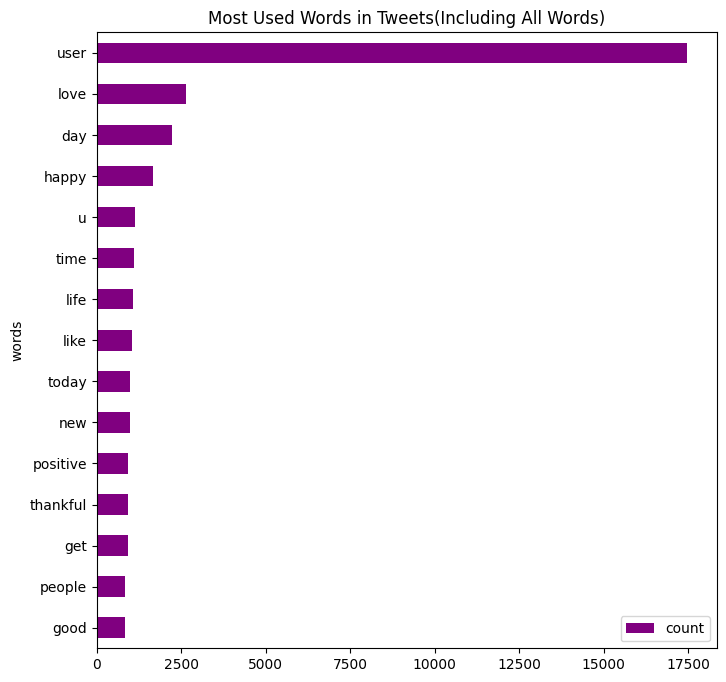

In [11]:
common_words = plot_top_words(df1, 'tweet_tokenized')

we can see that user have a very high frequency. we will be adding this to the stop-words. Since we have only one word, we are not going to write a for-loop. just one statement!

In [12]:
STOP_WORDS.add('user')

We will run the stop word removal part of the pipeline and lemmatization part again

In [13]:
print('remove stopwords...')
apply_stop_words(df1, 'tweet_tokenized')
print('lemmatize...')
create_lem_col(df1, 'tweet_tokenized')

remove stopwords...
lemmatize...


In [14]:
df1

,tweet,tweet_tokenized,tweet_tokenized_lemmatized
0,user when a father is dysfunctional and is so ...,"[father, selfish, dysfunction, run]","[father, selfish, dysfunction, run]"
1,user user thanks for lyft credit i cant use ca...,"[thanks, credit, cant, use, cause, dont, offer]","[thanks, credit, cant, use, cause, dont, offer]"
2,bihday your majesty,[majesty],[majesty]
3,model i love u take with u all the time in u...,"[model, love, u, take, u, time]","[model, love, u, take, u, time]"
4,factsguide society now motivation,"[society, motivation]","[society, motivation]"
...,...,...,...
31957,ate user isz that youuuðððððððððâï,[ate],[ate]
31958,to see nina turner on the airwaves trying to w...,"[see, turner, trying, wrap, mantle, genuine, h...","[see, turner, try, wrap, mantle, genuine, hero..."
31959,listening to sad songs on a monday morning otw...,"[listening, sad, morning, work, sad]","[listening, sad, morning, work, sad]"
31960,user sikh temple vandalised in in calgary wso ...,"[temple, act]","[temple, act]"


## Question 2

In [91]:
# Load CSV
df_ts = pd.read_csv('google.csv')
df_ts.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,45.75000,47.2500,45.65625,46.50000,31.572819,591800
1,2000-01-03,46.75000,46.9375,44.00000,45.09375,30.618002,3655600
2,2000-01-04,44.75000,45.7500,42.78125,42.81250,29.069048,2533200
3,2000-01-05,42.81250,44.1250,41.59375,43.43750,29.493437,3228000
4,2000-01-06,43.43750,43.8125,41.62500,42.25000,28.687130,2601000
5,2000-01-07,42.00000,44.2500,41.31250,43.43750,29.493437,1890600
6,2000-01-10,45.00000,47.3750,44.62500,47.21875,32.060841,2570000
7,2000-01-11,46.75000,47.0000,45.12500,45.28125,30.745306,1926200
8,2000-01-12,45.15625,47.7500,44.50000,46.75000,31.742579,2842400
9,2000-01-13,47.87500,47.8750,46.37500,46.90625,31.848656,1685000


In [92]:
df_ts.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5067,2020-02-24,119.339996,119.690002,116.970001,117.360001,116.726395,3041400
5068,2020-02-25,118.540001,118.779999,113.379997,114.660004,114.040977,3251400
5069,2020-02-26,115.980003,117.389999,114.290001,114.839996,114.219994,2896600
5070,2020-02-27,111.820000,113.709999,107.570000,107.720001,107.720001,3541300
5071,2020-02-28,103.959999,110.059998,103.500000,109.050003,109.050003,6036800
5072,2020-03-02,110.089996,111.440002,107.239998,111.269997,111.269997,3979400
5073,2020-03-03,110.129997,113.190002,106.570000,107.199997,107.199997,3416000
5074,2020-03-04,109.000000,112.540001,106.680000,112.459999,112.459999,2181000
5075,2020-03-05,109.029999,112.070000,107.919998,108.870003,108.870003,2197200
5076,2020-03-06,105.000000,107.459999,104.510002,107.000000,107.000000,3801200


In [139]:
len(df_ts)

5077

In [93]:
df_ts.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [94]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format='%Y-%m-%d')
df_ts.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [95]:
# correlation of the data
df_ts.corr(method = 'pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999304,0.999166,0.998701,0.980822,-0.298361
High,0.999304,1.000000,0.998653,0.999301,0.978697,-0.289132
Low,0.999166,0.998653,1.000000,0.999262,0.984535,-0.306212
Close,0.998701,0.999301,0.999262,1.000000,0.982123,-0.296948
Adj Close,0.980822,0.978697,0.984535,0.982123,1.000000,-0.295280
Volume,-0.298361,-0.289132,-0.306212,-0.296948,-0.295280,1.000000


In [164]:
df_volume = df_ts[['Date','Volume']]
df_volume.index = df_volume['Date']
df_volume.sort_index(inplace=True)
del df_volume['Date']
df_roll_mean_volume = df_volume.rolling(5000).mean()
df_roll_std_volume = df_volume.rolling(5000).std()

In [165]:
df_volume.head(5)

,Volume
Date,
1999-12-31,591800
2000-01-03,3655600
2000-01-04,2533200
2000-01-05,3228000
2000-01-06,2601000


In [158]:
df_roll_mean_volume.tail(5)

,Volume
Date,
2020-03-02,2669314.4
2020-03-03,2670970.1
2020-03-04,2671748.1
2020-03-05,2671959.0
2020-03-06,2674038.7


In [159]:
df_roll_mean_volume.tail(5)

,Volume
Date,
2020-03-02,2669314.4
2020-03-03,2670970.1
2020-03-04,2671748.1
2020-03-05,2671959.0
2020-03-06,2674038.7


In [160]:
df_roll_std_volume.tail(5)

,Volume
Date,
2020-03-02,1.368452e+06
2020-03-03,1.368353e+06
2020-03-04,1.367852e+06
2020-03-05,1.367763e+06
2020-03-06,1.367897e+06


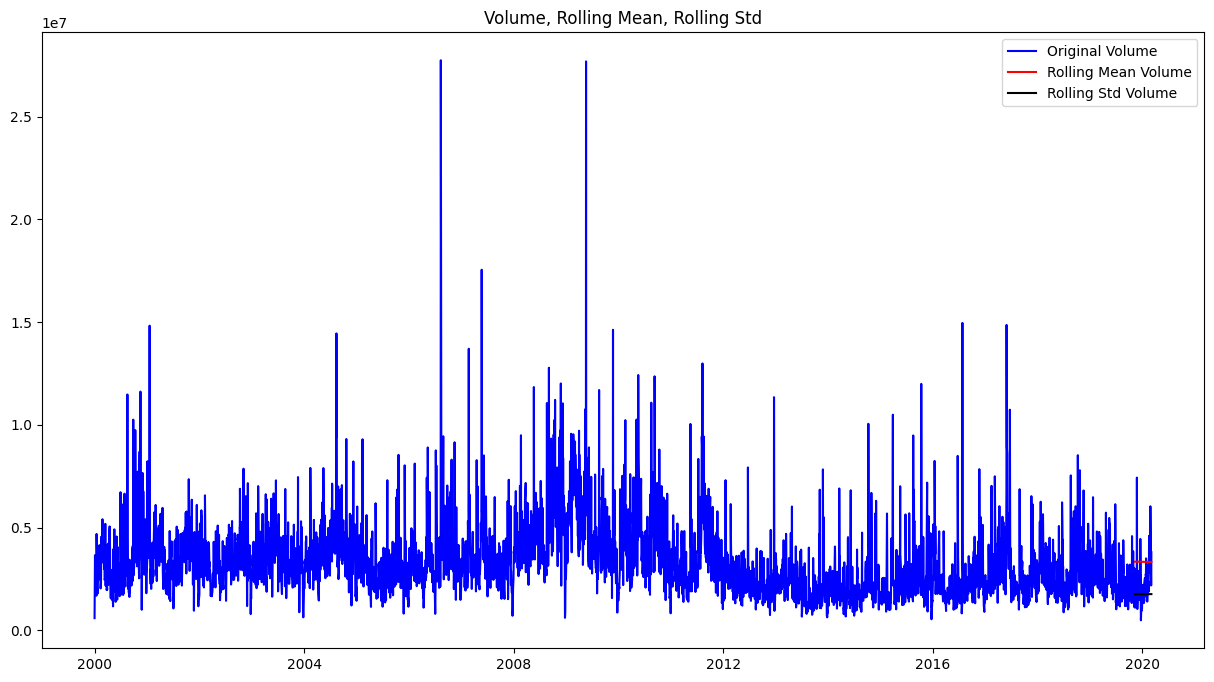

In [166]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(df_volume, color='blue',label='Original Volume')
plt.plot(df_roll_mean_volume, color='red', label='Rolling Mean Volume')
plt.plot(df_roll_std_volume, color='black', label = 'Rolling Std Volume')
plt.title('Volume, Rolling Mean, Rolling Std')
plt.legend(loc='best')
plt.show()

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose

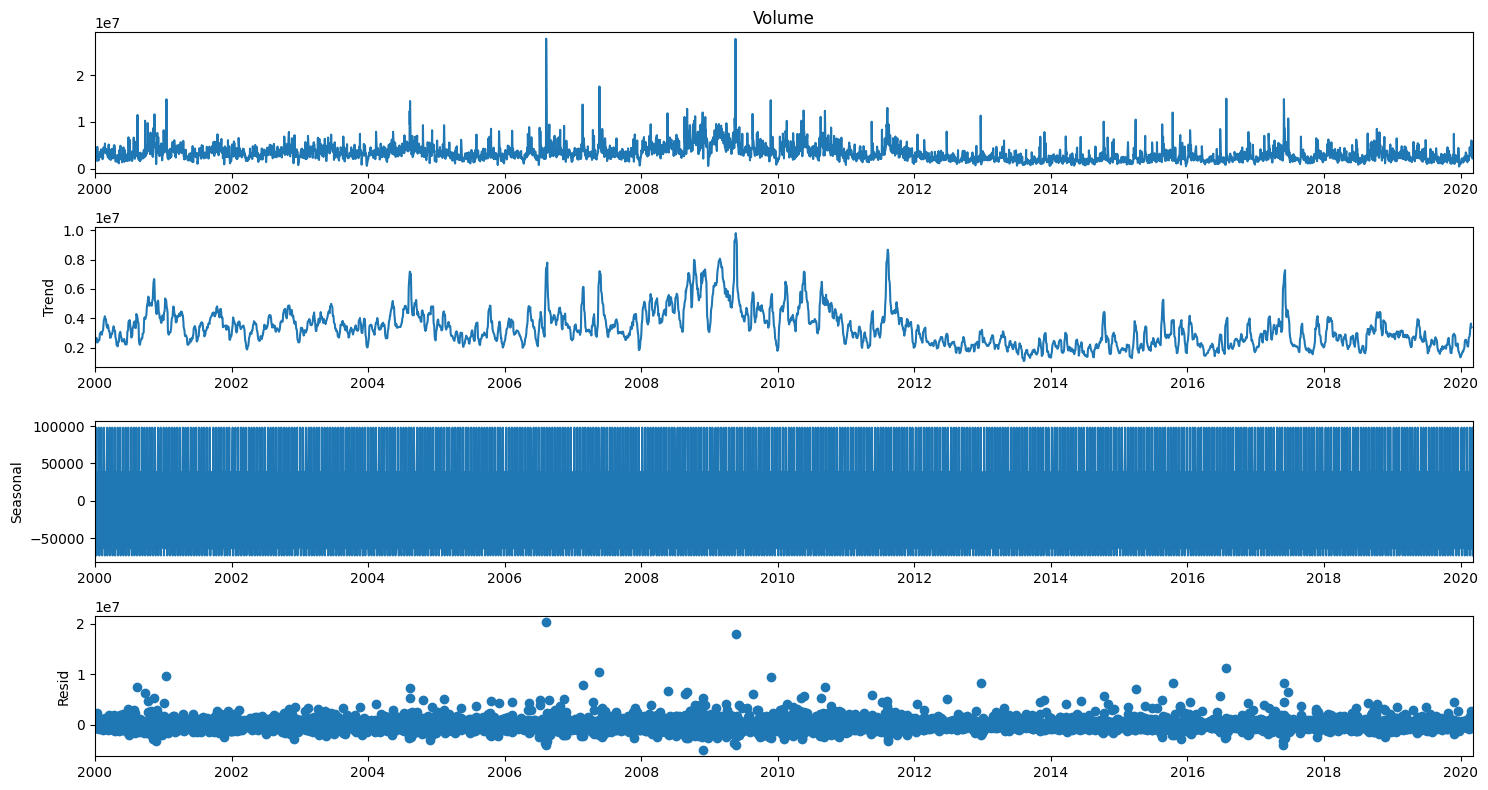

In [162]:
decompose = seasonal_decompose(df_volume['Volume'],period=10,model='additive')
decompose.plot()
plt.show()